In [149]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime, os

# Visualisation 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Machine learning
import catboost
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Data Manipulation
import pandas as pd # processing
import numpy as np # linear algebra

# Apply the custom formatting to your DataFrame

In [76]:
# Version Control
def print_versions():
    """
    Function to print versions of libraries being used. Function used for 
    formatting only
    """
    print(f"Pandas version: {pd.__version__}")
    print(f"NumPy version: {np.__version__}")
    print(f"Matplotlib version: {plt.matplotlib.__version__}")
    print(f"Seaborn version: {sns.__version__}")
    print(f"Missingno version: {msno.__version__}")
    print(f"Catboost version: {catboost.__version__}")
    print(f"Scikit-learn version: {sklearn.__version__}")
    
print_versions()

Pandas version: 2.0.3
NumPy version: 1.24.3
Matplotlib version: 3.8.2
Seaborn version: 0.12.2
Missingno version: 0.4.2
Catboost version: 1.2.2
Scikit-learn version: 1.3.0


In [77]:
# This loop walks through the directory tree starting at the specified path.
# For each directory in the tree, it lists all the files, joining the directory path and file name,
# and then prints the full path of each file.
for dirname, _, filenames in os.walk(r'C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\gender_submission.csv
C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\test.csv
C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\train.csv


In [105]:
# Load the train data
train_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [79]:
number_of_train_passengers = len(train_data)
print(f"The training data has {number_of_train_passengers} passengers")

The training data has 891 passengers


In [80]:
# Load the test data
test_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [81]:
number_of_test_passengers = len(test_data)
print(f"The test data has {number_of_test_passengers} passengers")

The test data has 418 passengers


In [82]:
# Load example submission
gender_submission_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\gender_submission.csv")
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 1) Exploratory Data Analysis

### Data Descriptions

**Survival:** 0 = No, 1 = Yes
    
**Pclass (ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd
    
**Sex:** Sex

**Age:** Age in years

**SibSp:** number of siblings/spouses aboard the Titanic

**Parch:** number of parents/children aboard the Titanic

**Ticket:** Ticket number

**Fare:** Passenger fare

**Cabin:** Cabin number

**Embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton    

In [110]:
# Description Stastics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### Initial Thoughts on Dataset

**Age:** Out of 891 passengers, only 714 have recorded 'Age' data. This discrepancy indicates that 'Age' information is missing for 177 passengers or have NaN instead of a value for age. 

**Cabin:** Upon looking at the first five rows,  'Cabin' appears to have several NaN values.

This will be explored with the "Missingno" matrix to visualise the missing values:

<Axes: >

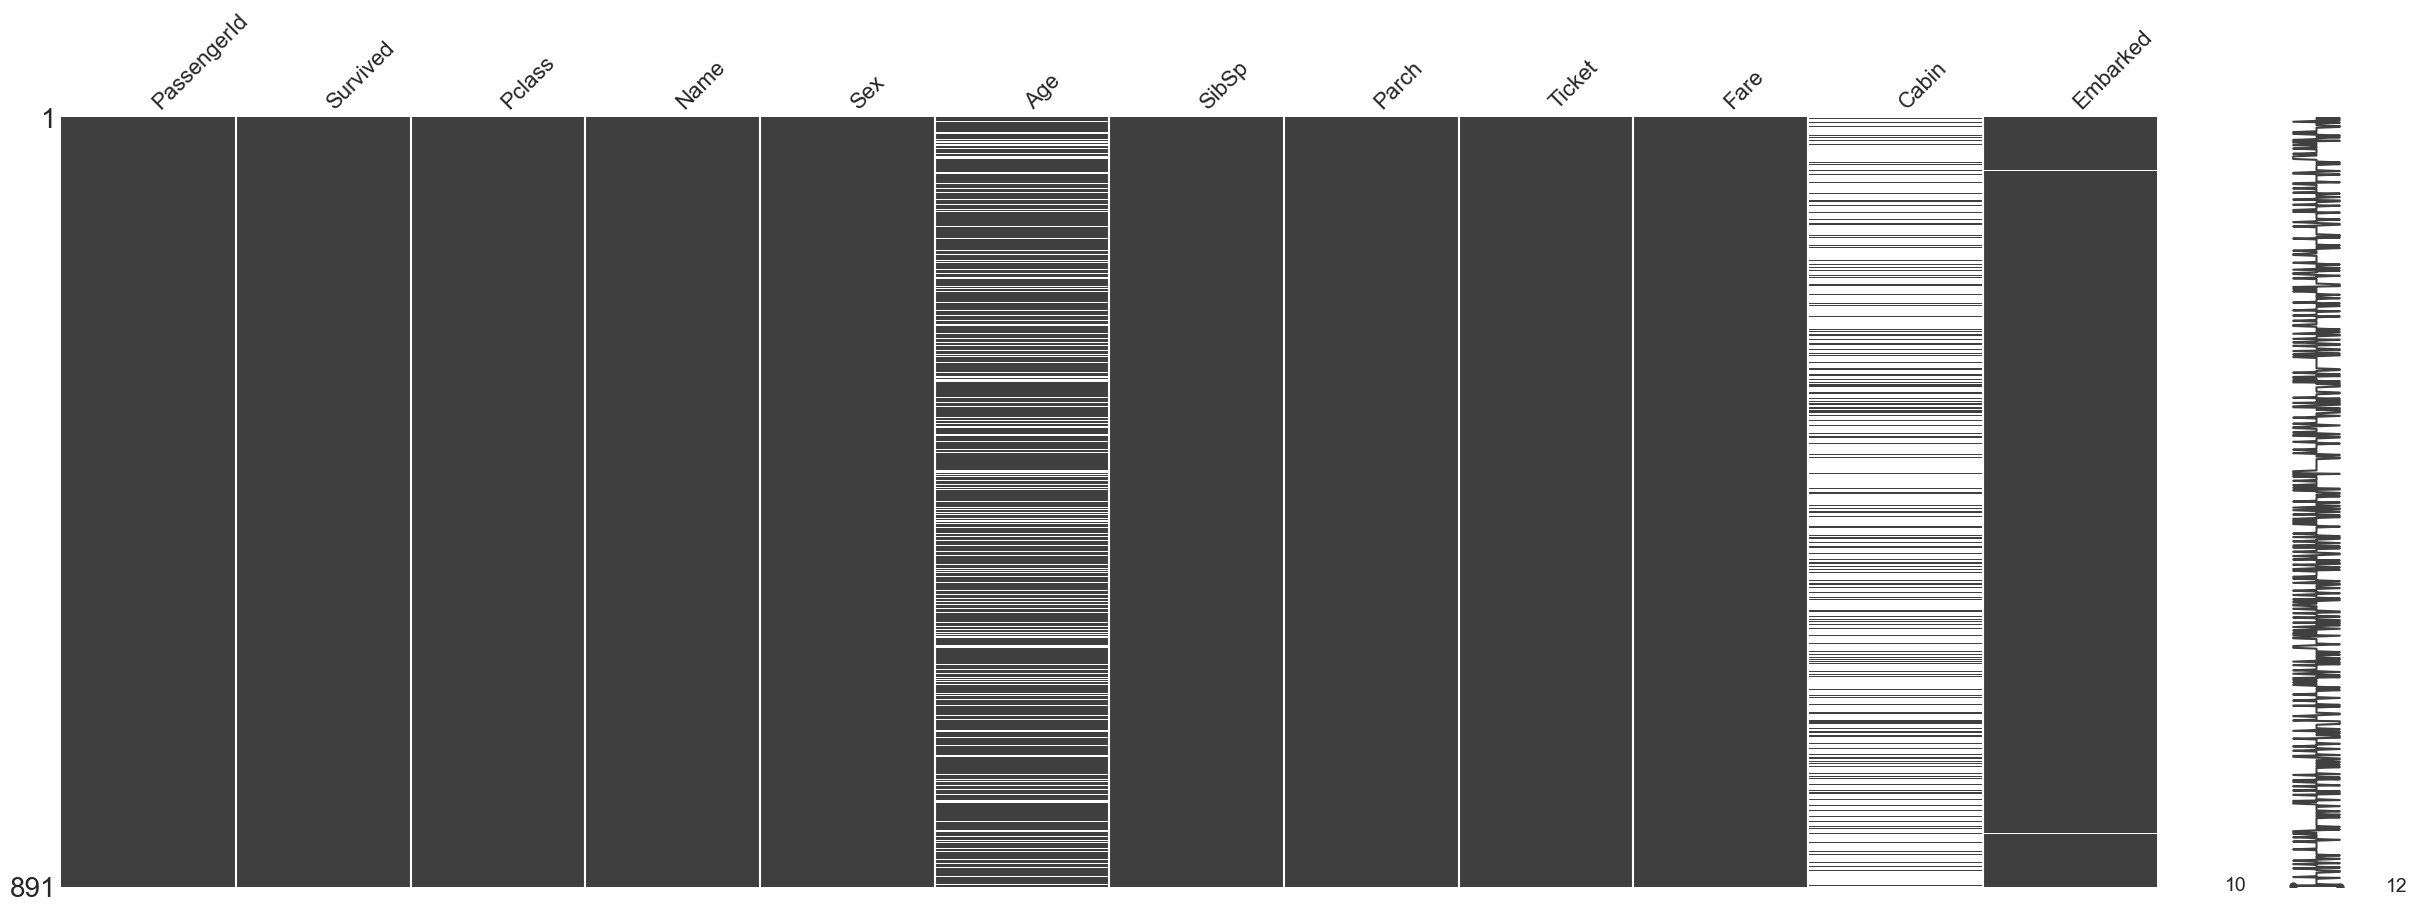

In [11]:
# Plot matrix of missing values
msno.matrix(train_data, figsize = (30, 10))

### Thoughts on matrix

**Age:** White gaps represent missing values, this should be explored further as to why these values are missing. Looking at the CSV file directly, it is noticable that several of the missing appear to Class 3 passengers (with the occasional Class 1 or 2). with the occasional. Visuals will be produced to explore this further. It is possible that Class 3 passenger information was generally poorly recorded.

**Cabin:** A signficiant amount of cabin data is missing according to the matrix, it is not worth investigating this data further based on this as more data is required.

**Embarked:** It has been observed that two entries for "Embarked" are missing.


In [107]:
# Function to show the amount of missing values

def find_missing_values(df, columns):
    print("The missing or NaN values from each column are as follows:")
    missing_values = {}  # Initialise an empty dictionary
    for column in columns:
        missing_values[column] = df[column].isnull().sum()
    return missing_values

find_missing_values(train_data, train_data.columns)

The missing or NaN values from each column are as follows:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

### Create new dataframes
Two new dataframes will be created to seperate discrete and continuous data.


In [117]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Target Variable: Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine model to predict based off all features.

Survived
0    549
1    342
Name: count, dtype: int64


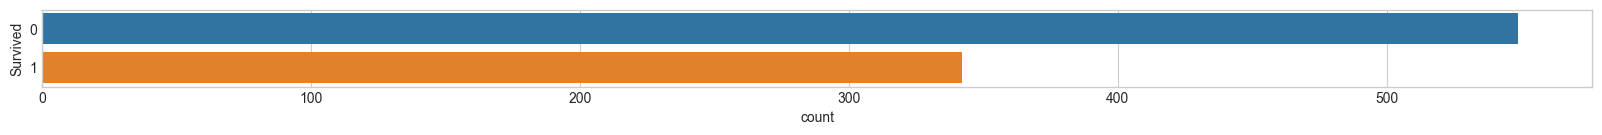

In [131]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train_data)
print(train_data.Survived.value_counts())


Female survival statistics:
Survived
1    233
0     81
Name: count, dtype: int64
Percentage of women who survived: 74.20%


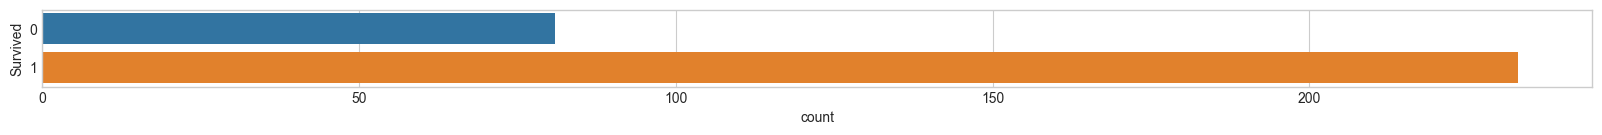

In [148]:
# How many women survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y=train_data.loc[train_data.Sex == "female", "Survived"], data=train_data)
print("Female survival statistics:")
women = train_data.loc[train_data.Sex == "female","Survived"]
print(women.value_counts())
rate_women = sum(women)/len(women)
print(f"Percentage of women who survived: {100*rate_men:.2f}%")

Male survival statistics:
Survived
0    468
1    109
Name: count, dtype: int64
Percentage of men who survived: 18.89%


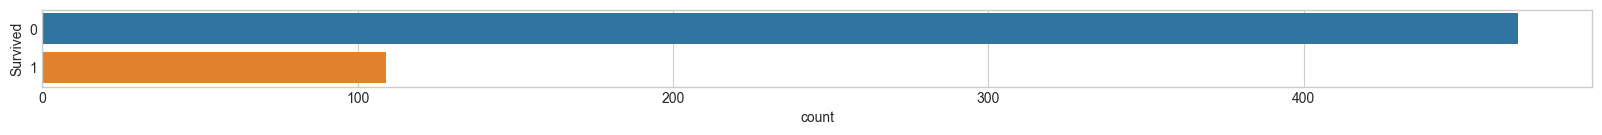

In [146]:
# How many men survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y=train_data.loc[train_data.Sex == "male", "Survived"], data=train_data)
print("Male survival statistics:")
men = train_data.loc[train_data.Sex == "male","Survived"]
print(men.value_counts())
rate_men = sum(men)/len(men)
print(f"Percentage of men who survived: {100*rate_men:.2f}%")

In [ ]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [115]:
# Different types of data in dataset
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
from sklearn.ensemble import RandomForestClassifier

Y_train = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : predictions})
output.to_csv('submission.csv', index = False)

In [125]:
# Load the submission data
submission_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\submission.csv")
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Pclass
1    216
2    184
3    491
Name: count, dtype: int64


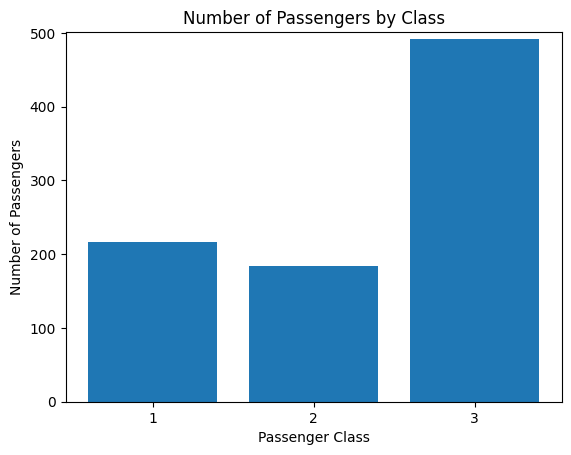

In [126]:
# Count the number of passengers by Pclass
passenger_count_by_pclass_train = train_data['Pclass'].value_counts().sort_index()
print(passenger_count_by_pclass_train)

# Plotting the bar chart for passenger count by Pclass
plt.bar(passenger_count_by_pclass_train.index.astype(str),passenger_count_by_pclass_train.values)
plt.title("Number of Passengers by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.ylim((0, passenger_count_by_pclass_train.values.max() + 10))
plt.show()

In [302]:
# Function to build bar chart
def survivor_statistics(original_dataframe, result_dataframe = None, category = None, result_column = "Survived"):
    
    # Get unique categories
    unique_categories = original_dataframe[category].unique()
    if result_dataframe is None:
        result_dataframe = original_dataframe
        
    if result_column in original_dataframe.columns:
        merged_dataframe = original_dataframe
        
    else:
        merged_dataframe = pd.merge(original_dataframe, result_dataframe, how = "left", on = "PassengerId")
        
    # Create a new CSV for the mertged dataframe
    merged_dataframe.to_csv('merged_dataframe_with_results.csv', index=False)
            
    # If the category is numeric, we sort the unique values; otherwise, we convert to list directly
    if pd.api.types.is_numeric_dtype(merged_dataframe[category]):
        unique_categories.sort()
    else:
        unique_categories = list(unique_categories)
   
    # Count the number of passengers by category 
    passenger_count_by_category_train = merged_dataframe[category].value_counts().reindex(unique_categories, fill_value = 0).sort_index()
    print(passenger_count_by_category_train)
    
    # Count number of survivors in category 
    survivor_count_by_category_train = merged_dataframe[merged_dataframe["Survived"] == 1][category].value_counts().reindex(unique_categories, fill_value = 0).sort_index()
    print(survivor_count_by_category_train)
    
    # Count number of fatalities in category 
    fatality_count_by_category_train = merged_dataframe[merged_dataframe["Survived"] == 0][category].value_counts().reindex(unique_categories, fill_value = 0).sort_index()
    print(fatality_count_by_category_train)
    
    # Plot bar charts
    plt.bar(passenger_count_by_category_train.index, survivor_count_by_category_train.values, label = "Survivors")
    plt.bar(passenger_count_by_category_train.index, fatality_count_by_category_train, bottom = survivor_count_by_category_train.values, label = "Fatalities")
    plt.title(f"Proportion of Survivors vs Fatalities by {category}")
    plt.xlabel(f"{category}")
    plt.ylabel(f"Number of Passengers")
    plt.xticks(passenger_count_by_category_train.index)
    plt.ylim(0, 500)
    plt.legend()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Pclass
1    136
2     87
3    119
Name: count, dtype: int64
Pclass
1     80
2     97
3    372
Name: count, dtype: int64


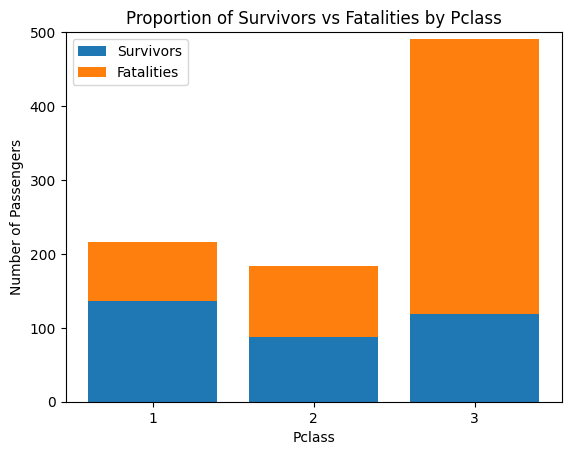

In [303]:
# Survivor statistic by Passenger Class (Pclass) - Training Data
survivor_statistics(original_dataframe = train_data, result_dataframe = None, category = "Pclass", result_column = "Survived")

Pclass
1    107
2     93
3    218
Name: count, dtype: int64
Pclass
1    53
2    31
3    64
Name: count, dtype: int64
Pclass
1     54
2     62
3    154
Name: count, dtype: int64


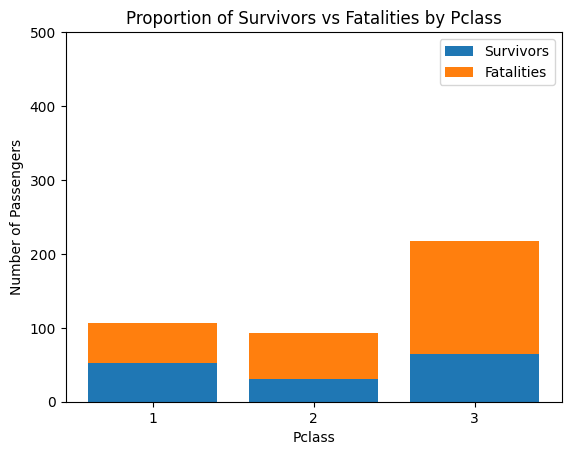

In [304]:
# Survivor statistic by Passenger Class (Pclass) - Test Data
survivor_statistics(original_dataframe = test_data, result_dataframe = submission_data, category = "Pclass", result_column = "Survived")

Sex
female    314
male      577
Name: count, dtype: int64
Sex
female    233
male      109
Name: count, dtype: int64
Sex
female     81
male      468
Name: count, dtype: int64


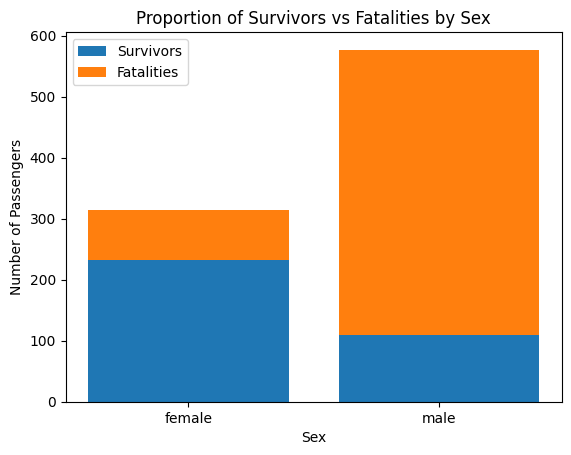

In [250]:
# Survivor statistic by Passenger Class (Sex) - Training Data
survivor_statistics(train_data, train_data, 'Sex')

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: count, dtype: int64
SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: count, dtype: int64


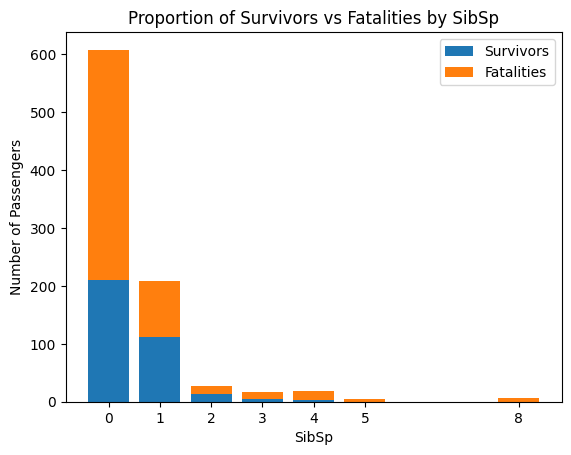

In [251]:
# Survivor statistic by number of siblings and spouses - Training Data
survivor_statistics(train_data, train_data, 'SibSp')



Sex
female    314
male      577
Name: count, dtype: int64
Sex
female    233
male      109
Name: count, dtype: int64
Sex
female     81
male      468
Name: count, dtype: int64


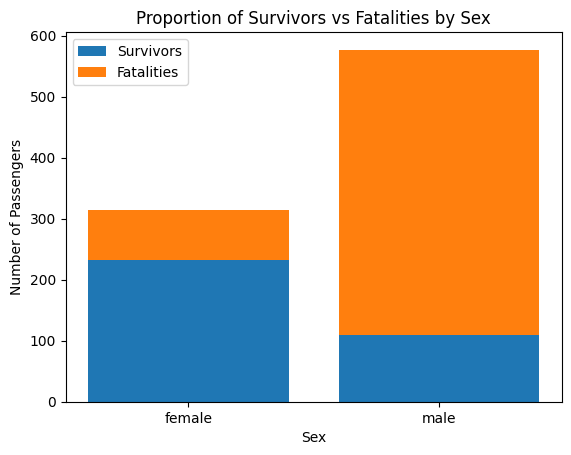

In [254]:
# Survivor statistic by number of parents and children - Training Data
survivor_statistics(train_data, train_data, 'Sex')

# Survivor statistic by number of parents and children - Test Data
survivor_statistics(train_data, train_data, 'Sex')

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64
Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: count, dtype: int64
Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: count, dtype: int64


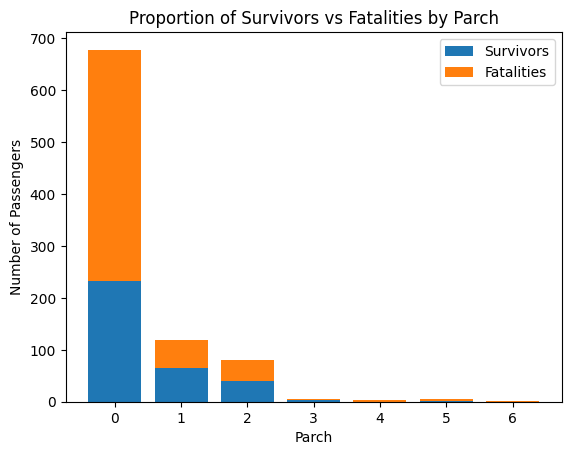

In [252]:
# Survivor statistic by number of parents and children - Training Data
survivor_statistics(train_data, train_data, 'Parch')